In [1]:
# Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results)

#mouse_metadata.head()
#study_results.head()


# Combine the data into a single dataset
mscomb = mouse_metadata.merge(study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
mscomb.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#rename columns with () in name - do not know if this will cause issues - so changing
mscomb = mscomb.rename(columns = {"Weight (g)" : "Weight_g",
                                 "Tumor Volume (mm3)" : "Tumor Volume_mm3"})
mscomb.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor Volume_mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the for NAN, getting number of unique mice, making sure rows match, etc.
#mscomb.isna().sum()

# ---> .isna().sum()
# Mouse ID              0
# Drug Regimen          0
# Sex                   0
# Age_months            0
# Weight (g)            0
# Timepoint             0
# Tumor Volume (mm3)    0
# Metastatic Sites      0
# dtype: int64

# ---> .nunique()  ----> 249 unique mice
#.unique will give an array of the unique mice

# ---> .count()  --> number of each rows
# Mouse ID              1893
# Drug Regimen          1893
# Sex                   1893
# Age_months            1893
# Weight (g)            1893
# Timepoint             1893
# Tumor Volume (mm3)    1893
# Metastatic Sites      1893
# dtype: int64

# --> .describe()
#Age months, weight, timepoint, tumor volume, metastatic sites - numbers

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dupID = mscomb[mscomb.duplicated(["Mouse ID", "Timepoint"])]
dupID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor Volume_mm3,Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
#Visualize and verify dup data
mscomb.loc[905:920]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor Volume_mm3,Metastatic Sites
905,g867,Stelasyn,Female,9,25,5,46.880749,0
906,g867,Stelasyn,Female,9,25,10,48.183402,0
907,g867,Stelasyn,Female,9,25,15,51.060419,1
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1


In [7]:
# Made decision to average values for dup rows since the values were so close - 
# if there was a large difference, would have to make different decision

#Purpose of following steps are to
# - identify average of duplicate row values, remove dup row, then replace exiting value with average 

#1 - create seaprate df to run aggregate functions - 
#    separate df created df - not really needed but did to ensure integrity of 
#    other data
#2 - create grouped df based on mouse id and timepoint and then obtain the average value 
#3 - identify the average values that are used as replacement values
#4 - drop duplicate rows
#5 - insert average values into designated rows - conducted in cell below

#1 - created this copy df to play 
#msplay = mscomb

#this step creates a dataframe of only Mouse ID 989
# ms989 = msplay[(msplay['Mouse ID'] == 'g989')]
# ms989

#2 - This step grouped the dup ids on timepoint and then averaged the values
# ms989g = ms989.groupby(["Mouse ID", "Timepoint"]).agg({"Tumor Volume_mm3": ['mean']})

#3 - This is a copy of the Timepoint and its average value
# 0,  45.000000
# 5,  48.178597
# 10, 50.812842
# 15, 52.383936
# 20, 54.991886
# 25, 56.045564
# 30, 59.082294
# 35, 62.570880

#4 - This step drops a dup row - did not matter which row of duplicate values selected
#replacing the data occurs in the cell below
mscombnew = mscomb.drop([909, 911,913,915,917])
mscombnew.loc[907:920]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor Volume_mm3,Metastatic Sites
907,g867,Stelasyn,Female,9,25,15,51.060419,1
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [8]:
#finding the column number for the substitution
mscombnew.columns.get_loc("Tumor Volume_mm3")

6

In [9]:
#5a - replace values with averages for 0, 5, 10, 15, 20
#5a and 5b both work - went with 5a becuase if there were
#any additions or removals of columns in front of Tumor volume_mm3
#then using the column 6 would place the data in the wrong  column

mscombnew.loc[908,"Tumor Volume_mm3"] = 45.000000
mscombnew.loc[910,"Tumor Volume_mm3"] = 48.178597
mscombnew.loc[912,"Tumor Volume_mm3"] = 50.812842
mscombnew.loc[914,"Tumor Volume_mm3"] = 52.383936
mscombnew.loc[916,"Tumor Volume_mm3"] = 54.991886

In [10]:
#5b - replace values with averages for 0, 5, 10, 15, 20
# mscombnew.iloc[908,6] = 45.000000
# mscombnew.iloc[910,6] = 48.178597
# mscombnew.iloc[912,6] = 50.812842
# mscombnew.iloc[914,6] = 52.383936
# mscombnew.iloc[916,6] = 54.991886

In [11]:
# Confirming clean DataFrame with dropped rows and replaced values.
mscombnew.loc[906:922]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor Volume_mm3,Metastatic Sites
906,g867,Stelasyn,Female,9,25,10,48.183402,0
907,g867,Stelasyn,Female,9,25,15,51.060419,1
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.178597,0
912,g989,Propriva,Female,21,26,10,50.812842,0
914,g989,Propriva,Female,21,26,15,52.383936,1
916,g989,Propriva,Female,21,26,20,54.991886,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [12]:
# Identifed that 3 mice in the Ceftamin that did NOT complete the study.  
# Only had starting (Timepoint = 0) data and no following datapoints
# Mouse ID b447, t573, u153

#dropping them from main dataframe
mscombnew_3Cef = mscombnew.drop([594, 1551, 1583])
mscombnew_3Cef.nunique()

Mouse ID             246
Drug Regimen          10
Sex                    2
Age_months            24
Weight_g              16
Timepoint             10
Tumor Volume_mm3    1640
Metastatic Sites       5
dtype: int64

In [13]:
# Side evaluation: Did a check and saw that 3 mice from Ceftamin started but did not finish the study
# Side evaluation - remove the 3 mice that did not complete the study OR leave them 

#  will use the summary statisitics table to see if the 3 mice that started
# but did not finish causes an appreciable difference in any of the numbers

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen using ALL Ceftamin mice

mscombnew_AllCef = mscombnew.groupby(["Drug Regimen"]).agg({'Tumor Volume_mm3': ['mean', 'median', 'var', 'std', 'sem']})

mscombnew_AllCef.head(2)

Tumor Volume_mm3                                          
                         mean     median        var       std       sem
Drug Regimen                                                           
Capomulin           40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin            52.591172  51.776157  39.290177  6.268188  0.469821

In [15]:
#Running summary statistics table Ceftamin MINUS the 3 that started, but did not finish

mscombnew_m3Cef_gtv = mscombnew_3Cef.groupby(["Drug Regimen"]).agg({'Tumor Volume_mm3': ['mean', 'median', 'var', 'std', 'sem']})

mscombnew_m3Cef_gtv.head(2)

Tumor Volume_mm3                                          
                         mean     median        var       std       sem
Drug Regimen                                                           
Capomulin           40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin            52.721306  51.905447  38.957012  6.241555  0.471817

In [16]:
# Since the summary stats tables are really close - will complete rest of homework with
# ALL the Ceftamin mice to get same answers as others.  In real life - would have dropped the 3.

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

sstregime = mscombnew.groupby(["Drug Regimen"]).agg({'Tumor Volume_mm3': ['mean', 'median', 'var', 'std', 'sem']})

# Naming columns of Price aggregate functions
# Tumor Volume_mm3 reduced to TV
sstregime.columns = ["TV_Mean", "TV_Median", "TV_Variance", "TV_Standard_Deviation", "TV_SEM"]
sstregime

,TV_Mean,TV_Median,TV_Variance,TV_Standard_Deviation,TV_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.388228,50.833737,43.163594,6.569901,0.526013
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

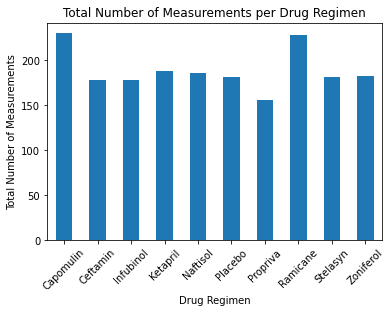

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
pand_barchart = mscombnew.groupby(["Drug Regimen"]).agg({'Tumor Volume_mm3': ['count']})

pand_barchart.plot(kind = "bar", title = "Total Number of Measurements per Drug Regimen", 
                           legend = False, rot = 45)

plt.ylabel("Total Number of Measurements")
plt.savefig("../Images/pandasbar_measvsregimen.png",bbox_inches='tight')
plt.show()

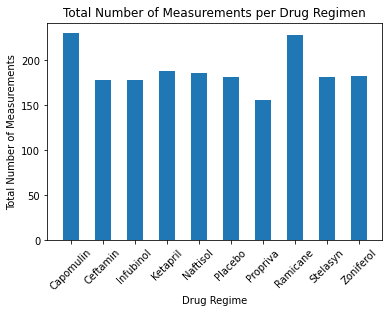

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plotpy_barchartx = mscombnew["Drug Regimen"].unique()
# plotpy_barchartx

# plotpy_barchartx returns data in order of presented in dataframe = 
# need to sort alphabetically to match x=axis and pandas chart
sortx = np.sort(plotpy_barchartx)
# sortx


plotpy_barcharty = mscombnew["Drug Regimen"].value_counts()
# plotpy_barcharty

#sorted on index to match values back with drug regimen - the x-axis and the pandas chart
sorty = plotpy_barcharty.sort_index()

plt.bar(sortx,sorty, width = 0.5)
plt.xticks(rotation=45)
plt.ylabel("Total Number of Measurements")
plt.xlabel("Drug Regime")
plt.title ("Total Number of Measurements per Drug Regimen")
plt.savefig("../Images/pyplotbar_measvsregimen.png",bbox_inches='tight')
plt.show()

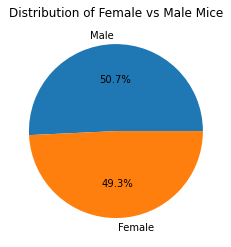

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pand_pie = mscombnew["Sex"].value_counts()
pand_pie.plot(kind = "pie",autopct="%1.1f%%")
plt.ylabel('')

plt.title ("Distribution of Female vs Male Mice")
plt.savefig("../Images/pandaspie_fvmdist.png")
plt.show()

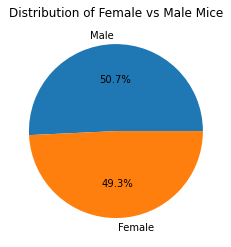

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plotpy_pielabels = mscombnew["Sex"].unique()

plotpy_piesizes = mscombnew["Sex"].value_counts()

plt.pie(plotpy_piesizes, labels = plotpy_pielabels, autopct="%1.1f%%")
plt.title ("Distribution of Female vs Male Mice")
plt.savefig("../Images/pyplotpie_fvmdist.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Some comments on the phrasing of the directions and truly uasable data.
# When the word calculate is presented, that infers something is done to something else.
# In visiting with other classmates - the instructions some intepreted this as meaning
# only grab and report the last tumor volume data point and then using that for the visualization.
# That is not calculating.  Also, that datpoint is only usefull for one thing - showing a value.  
# A calculated value such as (starting  - final) is a more valuable data point in that it can
# be used to calcuate rates and more effectively represent how successful something is in the respective
# time frame.  

tment_df =  mscombnew.loc[:,["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume_mm3"]]
# tment_df.nunique()

In [23]:
# locating the tumor volume that occurred at the last reading.  Used ".last" instead of ".max" or ".min"
# becuase do not know if tumor continued to grow.  Also, if used ".max" or ".min" that could grab a datapoint
# in the middle of the timepoints

lastvoldf = tment_df.groupby(['Mouse ID', 'Drug Regimen'], as_index=False)['Tumor Volume_mm3'].last()
lastvoldf = lastvoldf.rename(columns = {"Drug Regimen" : "DR_Last","Tumor Volume_mm3" : "TV_Last"})
# lastvoldf.head()

In [24]:
# locating tumor volume at timepoint = 0
firstvoldf = tment_df.groupby(['Mouse ID', 'Drug Regimen'], as_index=False)['Tumor Volume_mm3'].first()
firstvoldf = firstvoldf.rename(columns = {"Drug Regimen" : "DR_First","Tumor Volume_mm3" : "TV_First"})
# firstvoldf.head()

In [25]:
#this creates a df that holds the tumor volume (tv) first, last and change
mtumor = firstvoldf.merge(lastvoldf, on = "Mouse ID", how = "outer")

# sorting to allow quick review on how data looks - should not be really needed
mtumorsorted = mtumor.sort_values(by=['DR_First', 'Mouse ID'])

#dropping extraneous column
del mtumorsorted['DR_Last']

# (Start - Final) presents positive difference for tumor reduction and negative shows tumor growth 
mtumorsorted["TV_Change"] = mtumorsorted["TV_First"] - mtumorsorted["TV_Last"]
# mtumorsorted.head(20)

In [26]:
#Create specific dataframe
tmentCap = mtumorsorted[mtumorsorted['DR_First'] == ("Capomulin")]
tmentRam = mtumorsorted[mtumorsorted['DR_First'] == ("Ramicane")]
tmentInf = mtumorsorted[mtumorsorted['DR_First'] == ("Infubinol")]
tmentCef = mtumorsorted[mtumorsorted['DR_First'] == ("Ceftamin")]

In [27]:
#Create function OR FOR LOOP for this
# - - - - - - - - - - - - - - -- - - - - -- 

# #Calculate quartiles and IQR qautitatively determine potential outliers
# FTV_tment = tmentInf["TV_Change"]

# quartiles = FTV_tment.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# qseries = [lowerq, upperq, iqr, lower_bound, upper_bound]
# qseries

# dfx = pd.DataFrame(qseries, index = ['lowerq', 'upperq', 'iqr', 'lower_bound', 'upper_bound'])
# dfx.columns = ["Infubinol"]
# dfx

# outchkInf = (FTV_tmentInf < lower_bound) | (FTV_tmentInf > upper_bound)
# outchkInf = outchkInf.to_frame('Outlier')
# # outchkInf

# tmentInfO = tmentInf.merge(outchkInf, how = "outer", left_index=True, right_index=True)
# tmentInfO["Outlier"] = tmentInfO["Outlier"]*1
# # tmentInfO.dtypes
# tmentInfO.loc[tmentInfO['Outlier'] == 1]

In [28]:
#Calculate quartiles and IQR  - Capomulin

# OUTLIER IS CALCUATED IN SEPARATE SET OF STEPS

# NOTE - USING MY CHANGE COLUMN BECAUSE THIS IS PRESENTATION OF THE 
# DELTA OF TUMOR VOLUME AGAINST START AND FINAL.  THIS
# ALSO ALLOWS FOR A BOX CHART THAT GIVE A TRUE (AND SIMPLE) REPRESENTATION
# OF THE DATA WHEN LOOKING FOR AN "EFFECTIVE" TREATMENT DRUG

FTV_tmentCap = tmentCap["TV_Change"]
# FTV_tmentCap

quartilesCap = FTV_tmentCap.quantile([.25,.5,.75])
lowerqCap = quartilesCap[0.25]
upperqCap = quartilesCap[0.75]
medianCap = quartilesCap[0.5]
iqrCap = upperqCap-lowerqCap
lower_boundCap = lowerqCap - (1.5*iqrCap)
upper_boundCap = upperqCap + (1.5*iqrCap)

qseriesCap = [lowerqCap, upperqCap, iqrCap, lower_boundCap, upper_boundCap, medianCap]

statsCap_df = pd.DataFrame(qseriesCap, index = ['lowerq', 'upperq', 'iqr', 'lower_bound', 'upper_bound', 'median'])
statsCap_df.columns = ["Capomulin"]
# statsCap_df.round(2)

In [29]:
#Calculate quartiles and IQR  - Ramicane qautitatively determine potential outliers -
FTV_tmentRam = tmentRam["TV_Change"]

quartilesRam = FTV_tmentRam.quantile([.25,.5,.75])
lowerqRam = quartilesRam[0.25]
upperqRam = quartilesRam[0.75]
medianRam = quartilesRam[0.5]
iqrRam = upperqRam-lowerqRam
lower_boundRam = lowerqRam - (1.5*iqrRam)
upper_boundRam = upperqRam + (1.5*iqrRam)

qseriesRam = [lowerqRam, upperqRam, iqrRam, lower_boundRam, upper_boundRam, medianRam]

statsRam_df = pd.DataFrame(qseriesRam, index = ['lowerq', 'upperq', 'iqr', 'lower_bound', 'upper_bound', 'median'])
statsRam_df.columns = ["Ramicane"]
# statsRam_df.round(2)

In [30]:
#Calculate quartiles and IQR - Infubinol
FTV_tmentInf = tmentInf["TV_Change"]

quartilesInf = FTV_tmentInf.quantile([.25,.5,.75])
lowerqInf = quartilesInf[0.25]
upperqInf = quartilesInf[0.75]
iqrInf = upperqInf-lowerqInf
medianInf = quartilesInf[0.5]
lower_boundInf = lowerqInf - (1.5*iqrInf)
upper_boundInf = upperqInf + (1.5*iqrInf)

qseriesInf = [lowerqInf, upperqInf, iqrInf, lower_boundInf, upper_boundInf, medianInf]

statsInf_df = pd.DataFrame(qseriesInf, index = ['lowerq', 'upperq', 'iqr', 'lower_bound', 'upper_bound', 'median'])
statsInf_df.columns = ["Infubinol"]
# statsInf_df

In [31]:
#Calculate quartiles and IQR - Ceftamin
FTV_tmentCef = tmentCef["TV_Change"]

quartilesCef = FTV_tmentCef.quantile([.25,.5,.75])
lowerqCef = quartilesCef[0.25]
upperqCef = quartilesCef[0.75]
iqrCef = upperqCef-lowerqCef
medianCef = quartilesCef[0.5]
lower_boundCef = lowerqCef - (1.5*iqrCef)
upper_boundCef = upperqCef + (1.5*iqrCef)

qseriesCef = [lowerqCef, upperqCef, iqrCef, lower_boundCef, upper_boundCef, medianCef]

statsCef_df = pd.DataFrame(qseriesCef, index = ['lowerq', 'upperq', 'iqr', 'lower_bound', 'upper_bound', 'median'])
statsCef_df.columns = ["Ceftamin"]
# statsCef_df

In [32]:
# OUTLIER CALCULATIONS

#qautitatively determine potential outliers  - Capomulin
outchkCap = (FTV_tmentCap < lower_boundCap) | (FTV_tmentCap > upper_boundCap)
outchkCap = outchkCap.to_frame('Outlier')

tmentCapO = tmentCap.merge(outchkCap, how = "outer", left_index=True, right_index=True)
tmentCapO["Outlier"] = tmentCapO["Outlier"]*1
# tmentCapO.head()

In [33]:
#qautitatively determine potential outliers - Ramicane
outchkRam = (FTV_tmentRam < lower_boundRam) | (FTV_tmentRam > upper_boundRam)
outchkRam = outchkRam.to_frame('Outlier')

tmentRamO = tmentRam.merge(outchkRam, how = "outer", left_index=True, right_index=True)
tmentRamO["Outlier"] = tmentRamO["Outlier"]*1
# tmentRamO.head()

In [34]:
#qautitatively determine potential outliers - Infubinol
outchkInf = (FTV_tmentInf < lower_boundInf) | (FTV_tmentInf > upper_boundInf)
outchkInf = outchkInf.to_frame('Outlier')
# outchkInf

tmentInfO = tmentInf.merge(outchkInf, how = "outer", left_index=True, right_index=True)
tmentInfO["Outlier"] = tmentInfO["Outlier"]*1
# tmentInfO.head()

In [35]:
#qautitatively determine potential outliers - Ceftamin
outchkCef = (FTV_tmentCef < lower_boundCef) | (FTV_tmentCef > upper_boundCef)
outchkCef = outchkCef.to_frame('Outlier')
# outchkCef

tmentCefO = tmentCef.merge(outchkCef, how = "outer", left_index=True, right_index=True)
tmentCefO["Outlier"] = tmentCefO["Outlier"]*1
# tmentCefO.head()

In [36]:
overallstat = pd.concat([statsCap_df, statsRam_df, statsInf_df, statsCef_df], axis=1, sort=False)
overallstat

,Capomulin,Ramicane,Infubinol,Ceftamin
lowerq,4.840780,4.340994,-20.525743,-19.299830
upperq,12.622643,13.439530,-9.048608,-3.722078
iqr,7.781863,9.098537,11.477135,15.577752
lower_bound,-6.832015,-9.306811,-37.741446,-42.666458
upper_bound,24.295438,27.087336,8.167095,19.644550
median,6.874836,8.438348,-15.165180,-14.851956


In [37]:
combOutlier = [tmentCapO, tmentRamO, tmentInfO, tmentCefO]
outlierCat = pd.concat(combOutlier)
outlierCat.loc[outlierCat['Outlier'] == 1]

,Mouse ID,DR_First,TV_First,TV_Last,TV_Change,Outlier
31,c326,Infubinol,45.0,36.321346,8.678654,1


In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# ftvcaparray = FTV_tmentCap.to_numpy()
# ftvramarray = FTV_tmentRam.to_numpy()
# ftvinfarray = FTV_tmentInf.to_numpy()
# ftvcefarray = FTV_tmentCef.to_numpy()

# boxframe = { 'Capomulin': ftvcaparray, 'Ramicane': ftvramarray, "Infubinol" : ftvinfarray, "Ceftamine" : ftvcefarray } 
# boxdata = pd.DataFrame(boxframe)
# #boxdata

# #defines and colors the outlier - in code - flierprops is the outlier
# green_diamond = dict(markerfacecolor='g', marker='D')

# boxplot = boxdata.boxplot(grid=False,flierprops=green_diamond)
# # boxplot = boxdata.boxplot(flierprops=green_diamond)

# #adds horizontal line (more can be added in reference list - separate with a comma)
# reference = [0]
# left, right = plt.xlim()
# plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')

# #addtion of text
# plt.text(1.65,-12, 'Box above zero - Tumor got smaller\n Box below zero - Tumor got larger',
#          horizontalalignment='center',
#          verticalalignment='top',
#          multialignment='center')

# plt.text(3.3,10, 'Outlier',
#          horizontalalignment='center',
#          verticalalignment='top',
#          multialignment='center')

# #axis labels and title               
# plt.ylabel("Difference in Tumor Vol (mm3) (Start - Finish)")
# plt.xlabel("Drug Regimen")
# plt.title ("Tumor Volume Change (Start-Finish) Comparison")

# # plt.savefig("../Images/boxplot_deltastatistics4reg.png",bbox_inches='tight')
# plt.savefig("../Images/boxplot_deltastatistics4reg.png")


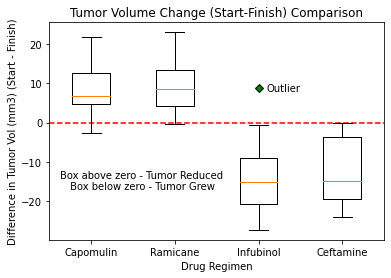

In [39]:
#Creating box plot in Matplotlib

ftvcaparray = FTV_tmentCap.to_numpy()
ftvramarray = FTV_tmentRam.to_numpy()
ftvinfarray = FTV_tmentInf.to_numpy()
ftvcefarray = FTV_tmentCef.to_numpy()

green_diamond = dict(markerfacecolor='g', marker='D')
data1 = [ftvcaparray, ftvramarray, ftvinfarray, ftvcefarray]
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamine']
fig, ax1 = plt.subplots()
ax1.set_title("Tumor Volume Change (Start-Finish) Comparison")
ax1.boxplot(data1, labels = labels, flierprops=green_diamond)

#placing the horizontal line at 0
reference = [0]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')


#placing text in chart
plt.text(1.6,-12, 'Box above zero - Tumor Reduced\n Box below zero - Tumor Grew',
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

plt.text(3.3,10, 'Outlier',
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center')

#labeling axis
plt.ylabel("Difference in Tumor Vol (mm3) (Start - Finish)")
plt.xlabel("Drug Regimen")


plt.savefig("../Images/boxplot_deltastatistics4reg.png")

plt.show()

## Line and Scatter Plots

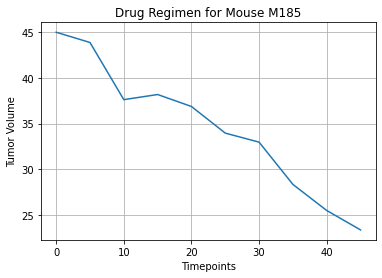

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capdf = tment_df[tment_df['Drug Regimen'] == ("Capomulin")]
ms185 = Capdf[(Capdf['Mouse ID'] == 's185')]
#ms185
x_axis = ms185["Timepoint"]
y_axis = ms185["Tumor Volume_mm3"]

fig, ax = plt.subplots()
ax.plot(x_axis,y_axis)

plt.grid()

# plt.xlim(0, 45.5)


plt.ylabel("Tumor Volume")
plt.xlabel("Timepoints")
plt.title ("Drug Regimen for Mouse M185")
plt.savefig("../Images/tv_vs_time_Capomuline.png",bbox_inches='tight')


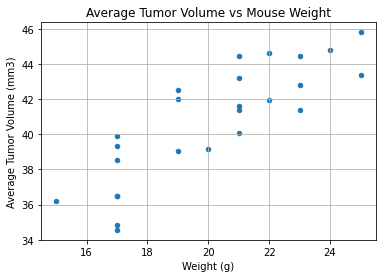

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tvmw = mscombnew.groupby(["Drug Regimen", "Mouse ID", "Weight_g"]).agg({'Tumor Volume_mm3': ['mean']})
tvmw.columns = tvmw.columns.droplevel(0)
tvmw = tvmw.reset_index()
pand_scatterchart = tvmw[tvmw['Drug Regimen'] == ("Capomulin")]
pand_scatterchart.head()
pand_scatterchart = pand_scatterchart.rename(columns = {"Weight_g" : "Weight (g)",
                                  "mean" : "Average Tumor Volume (mm3)"})

pand_scatterchart.plot(kind = "scatter", x = "Weight (g)" , y = "Average Tumor Volume (mm3)")

plt.grid()

plt.title ("Average Tumor Volume vs Mouse Weight")
plt.savefig("../Images/scatter_avgtv_vs_weight_Capomuline.png",bbox_inches='tight')

## Correlation and Regression

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = pand_scatterchart['Weight (g)']
tumormean = pand_scatterchart['Average Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumormean)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


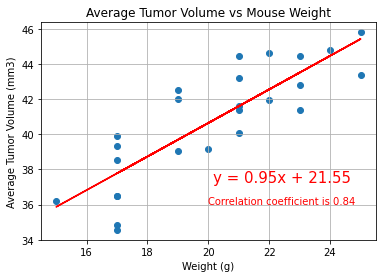

In [43]:
x_values = pand_scatterchart['Weight (g)']
y_values = pand_scatterchart['Average Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20.15,37.25),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title ("Average Tumor Volume vs Mouse Weight")

plt.annotate(f"Correlation coefficient is {round(correlation[0],2)}",(20,36),fontsize=10,color="red")

plt.xlim(14.5,25.5)

plt.grid()

plt.savefig("../Images/regression_avg_vs_weight.png",bbox_inches='tight')
plt.show()
